Assignment
In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Load the housing prices data from Thinkful's database.
Split your data into train and test sets.
Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
Is the performance of your model satisfactory? Why?
Try to improve your model in terms of predictive performance by adding or removing some variables.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import linear_model
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
table_name = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houses_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [4]:
Y = houses_df['saleprice']
X = houses_df[['overallqual','grlivarea', 'garagecars', 'lotarea', 'yearbuilt', 'fullbath', 'wooddecksf']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 13)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [6]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     681.5
Date:                Sat, 25 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:14:12   Log-Likelihood:                -13896.
No. Observations:                1168   AIC:                         2.781e+04
Df Residuals:                    1160   BIC:                         2.785e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.015e+06   9.29e+04    -10.928      

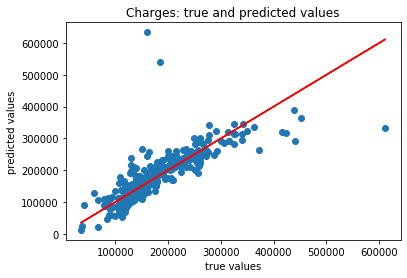

Mean absolute error of the prediction is: 29243.570454162054
Mean squared error of the prediction is: 2571394142.926069
Root mean squared error of the prediction is: 50708.91581296201
Mean absolute percentage error of the prediction is: 18.4107817119044


In [7]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [14]:
houses_df['totalsf'] = houses_df['totalbsmtsf'] + houses_df.firstflrsf + houses_df.secondflrsf

Y = houses_df['saleprice']
X = houses_df[['overallqual','totalsf', 'grlivarea', 'garagecars', 'lotarea', 'yearbuilt', 'fullbath', 'wooddecksf']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 13)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results.
print(results.summary())

The number of observations in training set is 1168
The number of observations in test set is 292
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     707.6
Date:                Sat, 25 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:34:00   Log-Likelihood:                -13813.
No. Observations:                1168   AIC:                         2.764e+04
Df Residuals:                    1159   BIC:                         2.769e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

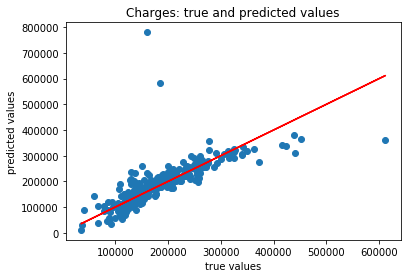

Mean absolute error of the prediction is: 27310.85498823617
Mean squared error of the prediction is: 3047922970.2404532
Root mean squared error of the prediction is: 55207.99733952005
Mean absolute percentage error of the prediction is: 17.34359128713333


In [15]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))